In [45]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Settled Locations

<Figure size 360x360 with 0 Axes>

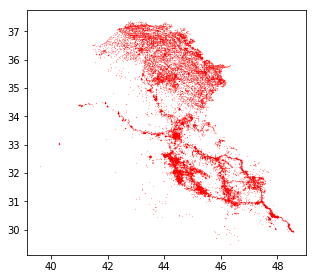

In [97]:
iq_locations = gpd.read_file('data/settled_locations/irq_pplp_ocha_20140722.shp')
iq_districts = gpd.read_file('data/Iraq_Districts/iraq_districts.shp')
fig = plt.figure()
iq_locations.plot(markersize = 0.01, color = 'red')

# Code for pop location figure

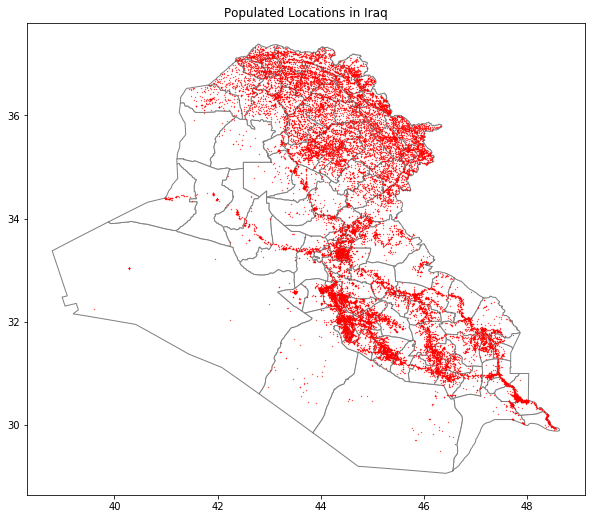

In [41]:
'''base = gpd.read_file('data/Iraq_Districts/iraq_districts.shp').plot(color = 'white', 
                                                                    edgecolor = 'grey')
iq_locations = gpd.read_file('data/settled_locations/irq_pplp_ocha_20140722.shp')
plt.rcParams["figure.figsize"] = (5,5)
iq_locations.plot(ax=base, color='red', markersize=0.1)
plt.title("Populated Locations in Iraq")
plt.savefig('PopulatedLocations.png')'''

In [157]:
iq_locations.head()

,PCode,PNameEn,PNameAr,Longitude,Latitude,PCodeAlt1,PNameAlt1,A1Code,A1NameEn,A2Code,A2NameEn,geometry
0,IQ-P00001,Al 'Bor (Shishan),حي العبور,41.977818,34.369352,110013.0,Al 'bor (Shishan),IQ-G01,Anbar,IQ-D001,Ana,POINT (41.977818 34.369352)
1,IQ-P00002,Al Ma'adid,المعاضيد,42.145227,34.226544,110011.0,Al ma'adid,IQ-G01,Anbar,IQ-D001,Ana,POINT (42.145227 34.226544)
2,IQ-P00003,Al Tadamon,حي التضامن,41.972490,34.367327,110017.0,Al Tadamon,IQ-G01,Anbar,IQ-D001,Ana,POINT (41.97249 34.367327)
3,IQ-P00004,Al-A'Wany Village,قرية العواني,41.987483,34.373356,110318.0,Al-A'wany Village,IQ-G01,Anbar,IQ-D001,Ana,POINT (41.987483 34.373356)
4,IQ-P00005,Al-Hasa Complex,,41.789831,34.493056,110021.0,Al-Hasa Complex,IQ-G01,Anbar,IQ-D001,Ana,POINT (41.789831 34.493056)


In [74]:
iq_locations.dissolve(by='A1NameEn').head()

,geometry,PCode,PNameEn,PNameAr,Longitude,Latitude,PCodeAlt1,PNameAlt1,A1Code,A2Code,A2NameEn
A1NameEn,,,,,,,,,,,
Anbar,"(POINT (39.6 32.25), POINT (40.277075 33.03895...",IQ-P00001,Al 'Bor (Shishan),حي العبور,41.977818,34.369352,110013.0,Al 'bor (Shishan),IQ-G01,IQ-D001,Ana
Babylon,"(POINT (43.85416667 34.18277778), POINT (44.02...",IQ-P07068,Abas al-Yasien,,44.814167,32.165278,609670.0,Abas al-yasien,IQ-G06,IQ-D034,Hashimiya
Baghdad,"(POINT (43.98 33.16), POINT (44.02 33.18), POI...",IQ-P08154,1 Athar,1 اذار,44.177778,33.301944,767166.0,1 Athar,IQ-G07,IQ-D038,Abu Ghraib
Basrah,"(POINT (44.312482 31.989749), POINT (47.15 30....",IQ-P00557,Aal Abrahim (Electricity Project),,47.981944,30.455556,205258.0,Aal abrahim (electricy project),IQ-G02,IQ-D009,Abu Al-Khaseeb
Dahuk,"(POINT (42.337 37.0673), POINT (42.365 37.091)...",IQ-P09807,11 Athar,,43.337300,37.048800,811917.0,11 Athar,IQ-G08,IQ-D048,Amedi


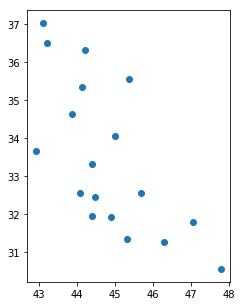

In [98]:
iq_locations_diss = iq_locations.dissolve(by='A1NameEn')
geo = iq_locations_diss.geometry.centroid
iq_locations_diss['geometry'] = geo
iq_locations_diss.plot()

In [89]:
iq_locations_diss.head()

,geometry,PCode,PNameEn,PNameAr,Longitude,Latitude,PCodeAlt1,PNameAlt1,A1Code,A2Code,A2NameEn
A1NameEn,,,,,,,,,,,
Anbar,POINT (42.93260091977069 33.6574294717202),IQ-P00001,Al 'Bor (Shishan),حي العبور,41.977818,34.369352,110013.0,Al 'bor (Shishan),IQ-G01,IQ-D001,Ana
Babylon,POINT (44.48791680170388 32.44899212777464),IQ-P07068,Abas al-Yasien,,44.814167,32.165278,609670.0,Abas al-yasien,IQ-G06,IQ-D034,Hashimiya
Baghdad,POINT (44.38721834876608 33.31903306523653),IQ-P08154,1 Athar,1 اذار,44.177778,33.301944,767166.0,1 Athar,IQ-G07,IQ-D038,Abu Ghraib
Basrah,POINT (47.7870157225835 30.55455170791643),IQ-P00557,Aal Abrahim (Electricity Project),,47.981944,30.455556,205258.0,Aal abrahim (electricy project),IQ-G02,IQ-D009,Abu Al-Khaseeb
Dahuk,POINT (43.11365751758269 37.04526998172793),IQ-P09807,11 Athar,,43.337300,37.048800,811917.0,11 Athar,IQ-G08,IQ-D048,Amedi


# Districts

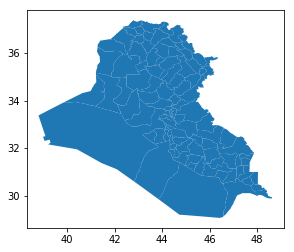

In [42]:
iq_districts = gpd.read_file('data/Iraq_Districts/iraq_districts.shp')
iq_districts.plot()

In [43]:
iq_districts_centroids = iq_districts.centroid

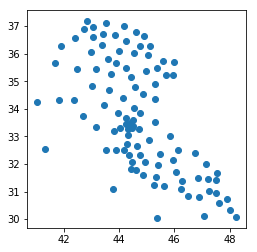

In [44]:
iq_districts_centroids.plot()

In [45]:
iq_districts['geometry'] = iq_districts_centroids

In [46]:
iq_districts.head()

,OBJECTID,ADM3NAME,ADM3CODE,ADM2NAME,ADM2CODE,AREA_KM2,PERIM_KM,geometry
0,1,Al-Shikhan,iq15053,Ninewa,iq15,1304.477640,185.494463,POINT (43.40346235506792 36.72056301616691)
1,2,Tilkaif,iq15100,Ninewa,iq15,1247.191304,168.651504,POINT (43.03342539954171 36.58669739348522)
2,3,Al-Hamdaniya,iq15017,Ninewa,iq15,1785.729624,220.723098,POINT (43.38695416605427 36.3001746982245)
3,4,Mosul,iq15038,Ninewa,iq15,4335.375726,420.809044,POINT (42.96764284731583 36.06869587364601)
4,5,Telafar,iq15098,Ninewa,iq15,4460.156834,424.953377,POINT (42.40816811654253 36.58223684594847)


# Distance between district centroids, polygons

In [99]:
iq_locations_diss.reset_index().head()

,A1NameEn,geometry,PCode,PNameEn,PNameAr,Longitude,Latitude,PCodeAlt1,PNameAlt1,A1Code,A2Code,A2NameEn
0,Anbar,POINT (42.93260091977069 33.6574294717202),IQ-P00001,Al 'Bor (Shishan),حي العبور,41.977818,34.369352,110013.0,Al 'bor (Shishan),IQ-G01,IQ-D001,Ana
1,Babylon,POINT (44.48791680170388 32.44899212777464),IQ-P07068,Abas al-Yasien,,44.814167,32.165278,609670.0,Abas al-yasien,IQ-G06,IQ-D034,Hashimiya
2,Baghdad,POINT (44.38721834876608 33.31903306523653),IQ-P08154,1 Athar,1 اذار,44.177778,33.301944,767166.0,1 Athar,IQ-G07,IQ-D038,Abu Ghraib
3,Basrah,POINT (47.7870157225835 30.55455170791643),IQ-P00557,Aal Abrahim (Electricity Project),,47.981944,30.455556,205258.0,Aal abrahim (electricy project),IQ-G02,IQ-D009,Abu Al-Khaseeb
4,Dahuk,POINT (43.11365751758269 37.04526998172793),IQ-P09807,11 Athar,,43.337300,37.048800,811917.0,11 Athar,IQ-G08,IQ-D048,Amedi


In [100]:
dist_iq_locations = iq_locations_diss.reset_index().copy()
trips = set()
count = 0
with open("data/routes_admin1.csv", "w") as f:
    #f.write(",".join(["name1", "name2", "distance\n"]))
    for i in dist_iq_locations.itertuples():
        dists = dist_iq_locations.geometry.distance(i.geometry) * 1000
        dists = [int(round(i,0)) for i in dists]
        tups = zip(dist_iq_locations.A1NameEn, dists)
        for destination, time in tups:
            key = (i.A1NameEn, destination)
            if key[0] == key[1]:
                continue
            if key not in trips:
                trips.add(key)
                trips.add((key[1], key[0]))
                f.write(",".join([key[0], key[1], str(time)]) + "\n")
                if key[0] != key[1]:
                    f.write(",".join([key[1], key[0], str(time)]) + "\n")
                    

In [119]:
dist_iq_locations.shape

(18, 12)

# take observed pops as baseline


In [49]:
# first read in populated locations and polygonize them
iq_locations = gpd.read_file('data/settled_locations/irq_pplp_ocha_20140722.shp')
iq_locations_diss = iq_locations.dissolve(by='A1NameEn')
geo = iq_locations_diss.geometry.convex_hull
iq_locations_diss['geometry'] = geo

df = pd.read_csv('iom_dtm_reports/d84.csv', usecols = ['Latitude', 'Longitude', 'Families', 'Individuals', 'District'])
points = [Point(x,y) for x, y in zip(df.Longitude, df.Latitude)]
df = gpd.GeoDataFrame(df)
df['geometry'] = points

In [50]:
df = df[['District', 'geometry', 'Families', 'Individuals']]
df_dissolve = df.dissolve(by = 'District', aggfunc='sum')
df_dissolve_poly = df_dissolve.copy()
df_dissolve_poly.geometry = df_dissolve.geometry.convex_hull
df_dissolve_centroids = df_dissolve.copy()
df_dissolve_centroids.geometry = df_dissolve.geometry.centroid
df_dissolve_centroids.shape

(102, 3)

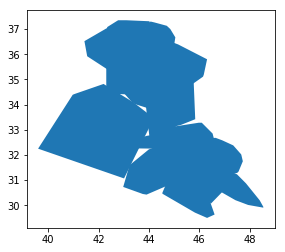

In [94]:
iq_locations_diss.plot() # here are the bins

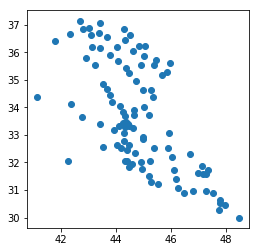

In [93]:
df_dissolve_centroids.plot() # here are the points

In [51]:
iq_locs_w_pop = gpd.sjoin(iq_locations_diss, df_dissolve_centroids).reset_index()
iq_locs_w_pop = iq_locs_w_pop.dissolve('index', aggfunc = 'sum')
iq_locs_w_pop = iq_locs_w_pop.reset_index()
iq_locs_w_pop.head()

,index,geometry,Longitude,Latitude,PCodeAlt1,Families,Individuals
0,Anbar,"POLYGON ((43.0125 31.068333, 39.6 32.25, 40.97...",335.822544,274.954816,880104.0,27396,164376
1,Babylon,"POLYGON ((44.754722 32.122222, 44.36 32.15, 44...",761.840839,546.809726,10364390.0,47065,282390
2,Baghdad,"POLYGON ((47.2138 30.9353, 44.18 32.99, 43.98 ...",618.488892,466.227216,10740324.0,36729,220374
3,Basrah,"POLYGON ((48.53 29.91, 47.938333 30.015278, 47...",623.765272,395.922228,2668354.0,3010,18060
4,Dahuk,"POLYGON ((42.5851 36.3719, 42.337 37.0673, 42....",260.023800,222.292800,4871502.0,76302,457812


In [52]:
# now extract name, lat,lon, families and individual # 
location_csv = pd.DataFrame()
location_csv['name'] = iq_locs_w_pop['index']

geoms = iq_locs_w_pop.centroid
location_csv['lat'] = [i.y for i in geoms]
location_csv['lon'] = [i.x for i in geoms]
location_csv['pop'] = iq_locs_w_pop['Families']

In [117]:
location_csv.head()

,name,lat,lon,pop
0,Anbar,32.960017,42.027628,19326
1,Babylon,33.001010,44.446212,35902
2,Baghdad,32.644376,45.172064,27052
3,Basrah,30.954440,46.825362,2672
4,Dahuk,36.946415,43.097581,74180


In [53]:
location_csv.to_csv('data/location_values_init.csv', header = False, index = False)

In [56]:
conflict_loc.head()

,Unnamed: 0,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,actor1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,geometry
1,2,1599129.0,368,IRQ6362,6362.0,2018-04-28,2018.0,1.0,Remote violence,Unidentified Armed Group (Iraq),...,34.1834,45.1221,3.0,Al Ghad Press,Subnational,"On Apr 28, an unidentified IED exploded in al ...",2,1.525125e+09,IRQ,POINT (45.1221 34.1834)
3,4,1599109.0,368,IRQ6357,6357.0,2018-04-27,2018.0,1.0,Battle-No change of territory,Military Forces of Iraq (2014-),...,36.4167,42.9649,1.0,Twitter (Isis Livemap),Other-Local,"On Apr 27, Iraqi military forces killed seven ...",7,1.525125e+09,IRQ,POINT (42.9649 36.4167)
4,5,1599104.0,368,IRQ6356,6356.0,2018-04-27,2018.0,1.0,Battle-No change of territory,Military Forces of Iraq (2014-),...,33.9956,44.3498,1.0,National Iraqi News Agency (NINA),National,"On Apr 27, a joint forces of the Iraqi militar...",1,1.525125e+09,IRQ,POINT (44.3498 33.9956)
5,6,1599099.0,368,IRQ6358,6358.0,2018-04-27,2018.0,1.0,Battle-No change of territory,Kerala Communal Militia (Iraq),...,36.9191,44.5604,1.0,Al Maloomah,Subnational,"On Apr 27, violent clashes erupted between Ker...",15,1.525125e+09,IRQ,POINT (44.5604 36.9191)
6,7,1599095.0,368,IRQ6361,6361.0,2018-04-27,2018.0,1.0,Battle-No change of territory,Islamic State (Iraq),...,35.2690,43.9108,2.0,Amaq (Telegram messaging application in Arabic),Other-Local,"On Apr 27, an Iraqi National Intelligence Serv...",1,1.525125e+09,IRQ,POINT (43.9108 35.269)


# find conflict spots

In [92]:
conflict_loc = pd.read_csv('data/acled_unprocessed_conflict_locations.csv')
conflict_loc = conflict_loc[conflict_loc['fatalities'] > 0]
conflict_loc_geo = gpd.GeoDataFrame(conflict_loc)
points = [Point(float(j), float(i)) for i, j in zip(conflict_loc.latitude, conflict_loc.longitude)]
conflict_loc_geo.geometry = points

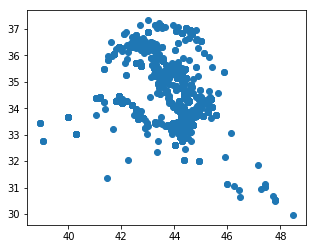

In [61]:
conflict_loc_geo.plot()

In [93]:
conflict_loc_geo = conflict_loc_geo.sort_values('event_date')
new_x = lambda x: int(x[:4] + x[5:7] + x[8:])
date_int = [new_x(i) for i in conflict_loc_geo['event_date']]
conflict_loc_geo['event_date_int'] = date_int
conflict_loc_geo = conflict_loc_geo[conflict_loc_geo['event_date_int'] > 20171129]

In [94]:
conflict_loc_geo.head()

,Unnamed: 0,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,actor1,...,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,geometry,event_date_int
1464,1465,1371418.0,368,IRQ4805,4805.0,2017-11-30,2017.0,1.0,Battle-No change of territory,Unidentified Armed Group (Iraq),...,44.2607,2.0,Ghad,Subnational,Unknown gunmen attacked a checkpoint manned by...,1,1.524054e+09,IRQ,POINT (44.2607 33.043),20171130
1466,1467,1371413.0,368,IRQ4800,4800.0,2017-11-30,2017.0,1.0,Battle-No change of territory,Military Forces of Iraq (2014-),...,43.5922,2.0,Sumaria,Subnational,Joint forces of the Iraqi army and the Popular...,6,1.524054e+09,IRQ,POINT (43.5922 35.2762),20171130
1465,1466,1371412.0,368,IRQ4799,4799.0,2017-11-30,2017.0,1.0,Remote violence,Military Forces of Iraq (2014-),...,42.6891,2.0,Xendan,Subnational,A gunship of the Iraqi air force struck an Isl...,1,1.524054e+09,IRQ,POINT (42.6891 35.7399),20171130
1458,1459,1371255.0,368,IRQ4808,4808.0,2017-12-01,2017.0,1.0,Violence against civilians,Islamic State (Iraq),...,44.3958,2.0,Amaq; Nashir (Telegram Messaging Application i...,Other-subnational,Islamic State militants set up an ambush and a...,1,1.524054e+09,IRQ,POINT (44.3958 33.6744),20171201
1455,1456,1371257.0,368,IRQ4810,4810.0,2017-12-01,2017.0,1.0,Remote violence,Unidentified Armed Group (Iraq),...,44.5824,2.0,Ghad,Subnational,One civilian was killed and four others wounde...,1,1.524054e+09,IRQ,POINT (44.5824 33.1009),20171201


In [95]:


def assign_round(new_x):
    start = 20170101
    # from http://iraqdtm.iom.int/IDPsML.aspx
    upper_dates = [20170105, 20170119, 20170202, 20170216, 
                  20170302, 20170316, 20170330, 20170413, 
                  20170427, 20170515, 20170530, 20170615,
                  20170630, 20170715, 20170730, 20170815,
                  20170830, 20170915, 20170930, 20171015, 
                  20171031, 20171115, 20171129, 20171215,
                  20171231,
                  20180115,20180131, 20180215, 20180228, 
                  20180315, 20180330, 20180415, 20180430,
                  ]
    top_val = len(upper_dates)
    offset = len(upper_dates)
    
    for i in upper_dates:
        if new_x > i:
            offset -= 1
            start = i
        else:
            return top_val - offset

conflict_loc_geo['round'] =  conflict_loc_geo.event_date_int.apply(assign_round)


In [96]:
locs = gpd.sjoin(iq_locs_w_pop, conflict_loc_geo).reset_index()
locs = locs[['index', 'round']]
locs.columns =['name', 'round']
locs.to_csv('data/conflict_locations_by_round.csv')

In [142]:
locs

,name,round
0,Anbar,29
1,Babylon,29
2,Baghdad,29
3,Anbar,30
4,Babylon,30
5,Anbar,23
6,Babylon,23
7,Baghdad,23
8,Anbar,25
9,Babylon,25


In [184]:
all_locs = set()
for i in conflict_locations.values():
    for j in i:
        all_locs.add(j[:3])
for i in conflict_locations.items():
    

{'Sul', 'Kir', 'Bag', 'Erb', 'Mis', 'Dah', 'Thi', 'Anb', 'Bas', 'Was', 'Diy', 'Naj', 'Bab', 'Ker', 'Sal', 'Qad', 'Nin'}


'for i in conflict_locations.items():\n    print(i)'

# Assemble location data and save to its respective csv

In [388]:
'''# use df_dissolve_centroids
for i in set(conflict_locations['round']):
    x = gpd.sjoin(df_dissolve_centroids, conflict_locations[conflict_locations['round'] == i], 'left').reset_index().fillna("MISSING")
    locations_csv = pd.DataFrame()
    locations_csv['lat'] = [i.y for i in x.geometry]
    locations_csv['lon'] = [i.x for i in x.geometry]
    locations_csv['name'] = x['index']
    locations_csv['pop'] = x['Families']
    locations_csv['region'] = 'Middle East'
    locations_csv['country'] = 'Iraq'
    locations_csv['conflict_date'] = i
    locations_csv['ind_pop'] = x['Individuals']
    type_place = []
    for j in x.itertuples():
        if j.index_right == "MISSING":
            type_place.append('camp')
        else:
            type_place.append('conflict')
    locations_csv['location_type'] = type_place
    locations_csv.to_csv('flee-release/location_data/locations_csv'+str(i)+".csv", header = False, index = False)'''

In [59]:
'''x = gpd.sjoin(df_dissolve_centroids, conflict_locations, 'left').reset_index().fillna("MISSING")
x = x.dissolve('index', aggfunc = ).reset_index()

locations_csv = pd.DataFrame()
locations_csv['lat'] = [i.y for i in x.geometry]
locations_csv['lon'] = [i.x for i in x.geometry]
locations_csv['name'] = x['index']
locations_csv['pop'] = x['Families']
locations_csv['region'] = 'Middle East'
locations_csv['country'] = 'Iraq'
locations_csv['conflict_date'] = x['round']
locations_csv['ind_pop'] = x['Individuals']
type_place = []
for j in x.itertuples():
    if j.index_right == "MISSING":
        type_place.append('camp')
    else:
        type_place.append('town')
locations_csv['location_type'] = type_place
locations_csv.to_csv('data/locations_csv_full.csv', header = False, index = False)'''

In [58]:
locations_csv.head()

,lat,lon,name,pop,region,country,conflict_date,ind_pop,location_type
0,30.452122,47.950556,Abu Al-Khaseeb,222,Middle East,Iraq,23,1332,conflict
1,33.307252,44.102076,Abu Ghraib,3959,Middle East,Iraq,5,23754,conflict
2,33.458519,44.381896,Adhamia,2534,Middle East,Iraq,5,15204,conflict
3,32.043651,45.240009,Afaq,334,Middle East,Iraq,22,2004,conflict
4,32.554836,43.537363,Ain Al-Tamur,38,Middle East,Iraq,15,228,conflict


# distance between all dissolved centroids

In [433]:
dist_iq_locations = df_dissolve_centroids.reset_index().copy()
dist_iq_locations.columns = ['name', 'geometry', 'Families', 'Individuals']

trips = set()
count = 0
with open("flee-release/routes.csv", "w") as f:
    #f.write(",".join(["name1", "name2", "distance\n"]))
    for i in dist_iq_locations.itertuples():
        dists = dist_iq_locations.geometry.distance(i.geometry) * 1000
        dists = [int(round(i,0)) for i in dists]
        tups = zip(dist_iq_locations.name, dists)
        for destination, time in tups:
            key = (i.name, destination)
            if key[0] == key[1]:
                continue
            if key not in trips:
                trips.add(key)
                trips.add((key[1], key[0]))
                f.write(",".join([key[0], key[1], str(time)]) + "\n")
                if key[0] != key[1]:
                    f.write(",".join([key[1], key[0], str(time)]) + "\n")
dist_iq_locations.to_file('locations_geodata.shp')

In [413]:
conflict_locations.head()

,round,geometry,Unnamed: 0,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
index_right,,,,,,,,,,,,,,,,,,,,,
0,0,(POLYGON ((43.52066757300617 33.20927950748511...,6354,1436275.0,368,IRQ16,16.0,2017-01-01,2017.0,1.0,...,Telafar,36.3809,42.4674,1.0,ISIS Live Map,Other-local,"01 Jan 2017, ISIS attacked and burned position...",0,1.524054e+09,IRQ
1,1,"(POLYGON ((48.0975 30.533, 48.09605541800166 3...",6248,1435318.0,368,IRQ88,88.0,2017-01-06,2017.0,1.0,...,Al Karabilah,34.3770,41.0544,1.0,Airwars,Other-local,"On Jan 6th, the global coalition and Iraqi for...",9,1.524054e+09,IRQ
2,2,"(POLYGON ((48.7731 29.9742, 48.77165541800166 ...",6022,1432282.0,368,IRQ319,319.0,2017-01-20,2017.0,1.0,...,Abu Ghraib,33.2919,44.0692,2.0,Al-Maalomah (Arabic),Subnational,"On Jan 20, 4 civilians were injured by an IED ...",0,1.524054e+09,IRQ
3,3,"(POLYGON ((48.0804 30.5085, 48.07895541800166 ...",5824,1578020.0,368,IRQ532,532.0,2017-02-03,2017.0,1.0,...,Makhol,35.2019,43.2723,2.0,The Baghdad Post,National,"On Feb 03, several of the Iran Militias in Ira...",10,1.524522e+09,IRQ
4,4,"(POLYGON ((46.4203 33.0594, 46.41885541800166 ...",5650,1426604.0,368,IRQ703,703.0,2017-02-17,2017.0,1.0,...,Haweeja,35.3271,43.7694,2.0,Basnews,Subnational,"On Feb 17, global coalition airstrike's target...",20,1.524054e+09,IRQ


In [434]:
dist_iq_locations.head()

,name,geometry,Families,Individuals
0,Abu Al-Khaseeb,POINT (47.95055627906665 30.45212203436363),222,1332
1,Abu Ghraib,POINT (44.10207648008262 33.30725164591957),3959,23754
2,Adhamia,POINT (44.38189573484045 33.45851885876179),2534,15204
3,Afaq,POINT (45.24000918569211 32.04365122221843),334,2004
4,Ain Al-Tamur,POINT (43.537363344 32.554835686),38,228


# Actual observed pops

In [211]:
'''# first read in known populated locations and polygonize them
iq_locations = gpd.read_file('data/settled_locations/irq_pplp_ocha_20140722.shp')
iq_locations_diss = iq_locations.dissolve(by='A1NameEn')
geo = iq_locations_diss.geometry.convex_hull
iq_locations_diss['geometry'] = geo

location_csv = pd.DataFrame()
location_csv['name'] = iq_locs_w_pop['index']

import os

iom_reports = os.listdir('iom_dtm_reports')
for i in range(len(iom_reports)):
    df = pd.read_csv('iom_dtm_reports/' + iom_reports[i], usecols = ['Latitude', 'Longitude', 'Families', 'Individuals', 'District'])
    points = [Point(x,y) for x, y in zip(df.Longitude, df.Latitude)]
    df = gpd.GeoDataFrame(df)
    df['geometry'] = points
    
    df = df[['District', 'geometry', 'Families', 'Individuals']]
    df_dissolve = df.dissolve(by = 'District', aggfunc='sum')
    df_dissolve_poly = df_dissolve.copy()
    df_dissolve_poly.geometry = df_dissolve.geometry.convex_hull
    df_dissolve_centroids = df_dissolve.copy()
    df_dissolve_centroids.geometry = df_dissolve.geometry.centroid
    
    iq_locs_w_pop = gpd.sjoin(iq_locations_diss, df_dissolve_centroids).reset_index()
    iq_locs_w_pop = iq_locs_w_pop.dissolve('index', aggfunc = 'sum')
    iq_locs_w_pop = iq_locs_w_pop.reset_index()

    geoms = iq_locs_w_pop.centroid
    location_csv['pop' + str(i)] = iq_locs_w_pop['Families']
    location_csv.fillna(0, inplace = True)'''

In [131]:
# first read in known populated locations and polygonize them
iq_locations = gpd.read_file('data/settled_locations/irq_pplp_ocha_20140722.shp')
iq_locations_diss = iq_locations.dissolve(by='A1NameEn')
geo = iq_locations_diss.geometry.convex_hull
iq_locations_diss['geometry'] = geo

df = pd.read_csv('iom_dtm_reports/r91.csv', usecols = ['Latitude', 'Longitude', 'Families', 'Individuals', 'Governorate'])
points = [Point(x,y) for x, y in zip(df.Longitude, df.Latitude)]
df = gpd.GeoDataFrame(df)
df['geometry'] = points

df_dissolve = df.dissolve(by = 'Governorate', aggfunc='sum')
df_dissolve_poly = df_dissolve.copy()
df_dissolve_poly.geometry = df_dissolve.geometry.convex_hull
df_dissolve_centroids = df_dissolve.copy()
df_dissolve_centroids.geometry = df_dissolve.geometry.centroid

iq_locs_w_pop = gpd.sjoin(iq_locations_diss, df_dissolve_centroids).reset_index()
iq_locs_w_pop = iq_locs_w_pop.dissolve('index', aggfunc = 'sum')
iq_locs_w_pop = iq_locs_w_pop.reset_index()

location_csv = pd.DataFrame()
location_csv['name'] = iq_locs_w_pop['index']

geoms = iq_locs_w_pop.centroid
location_csv['pop'] = iq_locs_w_pop['Families']
location_csv.fillna(0, inplace = True)

In [134]:
iq_locs_w_pop

,index,geometry,Longitude_left,Latitude_left,PCodeAlt1,Latitude_right,Longitude_right,Families,Individuals
0,Anbar,"POLYGON ((43.0125 31.068333, 39.6 32.25, 40.97...",41.977818,34.369352,110013.0,6868.392893,8727.330905,205876,1235256
1,Babylon,"POLYGON ((44.754722 32.122222, 44.36 32.15, 44...",44.814167,32.165278,609670.0,2753.835232,3661.998813,12774,76644
2,Baghdad,"POLYGON ((47.2138 30.9353, 44.18 32.99, 43.98 ...",44.177778,33.301944,767166.0,2753.835232,3661.998813,12774,76644
3,Dahuk,"POLYGON ((42.5851 36.3719, 42.337 37.0673, 42....",43.337300,37.048800,811917.0,37.067453,42.377117,130,780
4,Diyala,"POLYGON ((44.85 33.085, 44.5813 33.2012, 44.49...",45.070000,33.700000,1010033.0,6967.164059,9155.671150,36586,219516
5,Erbil,"POLYGON ((43.5 35.44, 43.42 35.5, 43.41 35.52,...",44.970000,36.700000,1106946.0,680.917958,826.211635,6023,36138
6,Kirkuk,"POLYGON ((45.54 34.31222222, 42.64333333 34.42...",132.127083,106.772166,3933864.0,11692.985642,14587.226832,136115,816690
7,Ninewa,"POLYGON ((44 35, 42.44 35.34, 41.55 35.92, 41....",131.644890,110.177100,4532694.0,22716.969934,27112.444423,255552,1533312
8,Salah al-Din,"POLYGON ((44.375504 33.732289, 44.3 33.75, 43....",86.389400,69.818600,3621980.0,11012.067684,13761.015198,130092,780552


In [128]:
location_csv.head()
location_csv.T.to_csv('truth_vals.csv', header = False, index = False)

In [127]:
test_df = pd.read_csv('iom_dtm_reports/r91.csv', usecols = ['Latitude', 'Longitude', 'Families', 'Individuals', 'Governorate'])


,Governorate,Latitude,Longitude,Families,Individuals
Governorate,,,,,
Anbar,AnbarAnbarAnbarAnbarAnbarAnbarAnbarAnbarAnbarA...,6868.392893,8727.330905,205876,1235256
Baghdad,BaghdadBaghdadBaghdadBaghdadBaghdadBaghdadBagh...,2753.835232,3661.998813,12774,76644
Dahuk,Dahuk,37.067453,42.377117,130,780
Diyala,DiyalaDiyalaDiyalaDiyalaDiyalaDiyalaDiyalaDiya...,6967.164059,9155.671150,36586,219516
Erbil,ErbilErbilErbilErbilErbilErbilErbilErbilErbilE...,680.917958,826.211635,6023,36138
Kirkuk,KirkukKirkukKirkukKirkukKirkukKirkukKirkukKirk...,4984.700712,6201.657424,45500,273000
Ninewa,NinewaNinewaNinewaNinewaNinewaNinewaNinewaNine...,17051.351264,20084.575363,204029,1224174
Salah al-Din,Salah al-DinSalah al-DinSalah al-DinSalah al-D...,6027.366972,7559.357773,84592,507552
